# DATASET LINK :
https://www.kaggle.com/datasets/wanghaohan/confused-eeg

In [ ]:
!pip install tensorflow
!pip install tensorflow-gan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Demography of dataset


In [ ]:
dm=pd.read_csv('demographic_info.csv')
dm

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


##Loading EEG dataset


In [ ]:
df=pd.read_csv('EEG_data.csv')
df


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


##Checking the whether the dataset is balanced

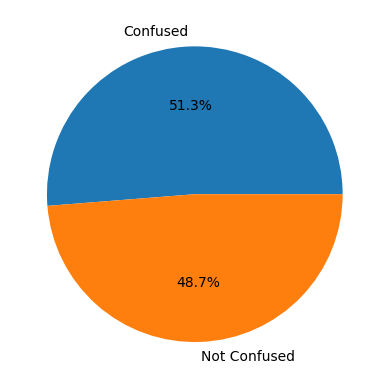

In [ ]:
one_counts=df[df['user-definedlabeln']==0]['SubjectID'].count()
zero_counts=df[df['user-definedlabeln']==1]['SubjectID'].count()
plt.pie([zero_counts,one_counts],labels=['Confused','Not Confused'],autopct='%1.1f%%')
plt.show()

## Droping some columns and dividing data into features and labels

In [ ]:
X=df.iloc[:,:-1]
X.drop(columns=['VideoID','SubjectID','predefinedlabel'],inplace=True)
y=df['user-definedlabeln']
print(X)


       Attention  Mediation    Raw      Delta      Theta    Alpha1    Alpha2  \
0           56.0       43.0  278.0   301963.0    90612.0   33735.0   23991.0   
1           40.0       35.0  -50.0    73787.0    28083.0    1439.0    2240.0   
2           47.0       48.0  101.0   758353.0   383745.0  201999.0   62107.0   
3           47.0       57.0   -5.0  2012240.0   129350.0   61236.0   17084.0   
4           44.0       53.0   -8.0  1005145.0   354328.0   37102.0   88881.0   
...          ...        ...    ...        ...        ...       ...       ...   
12806       64.0       38.0  -39.0   127574.0     9951.0     709.0   21732.0   
12807       61.0       35.0 -275.0   323061.0   797464.0  153171.0  145805.0   
12808       60.0       29.0 -426.0   680989.0   154296.0   40068.0   39122.0   
12809       60.0       29.0  -84.0   366269.0    27346.0   11444.0    9932.0   
12810       64.0       29.0  -49.0  1164555.0  1184366.0   50014.0  124208.0   

         Beta1     Beta2   Gamma1   Gam

<ipython-input-9-78c042f93c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['VideoID','SubjectID','predefinedlabel'],inplace=True)


## Before normalization

<Axes: >

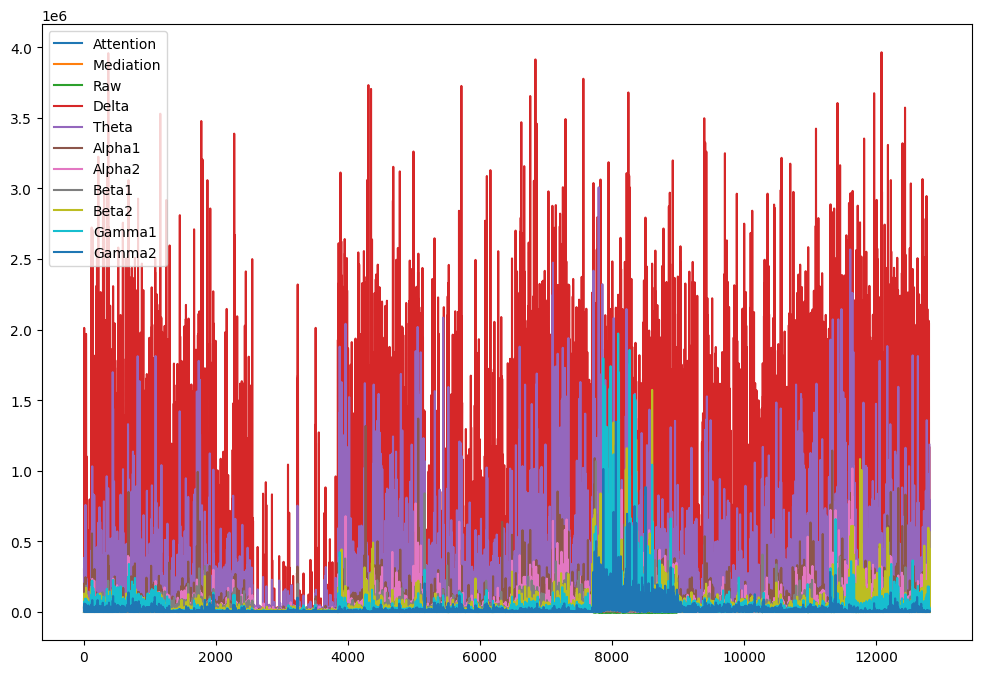

In [ ]:
X.iloc[:,:11].plot(figsize=(12,8))


## Normalizing data

<Axes: >

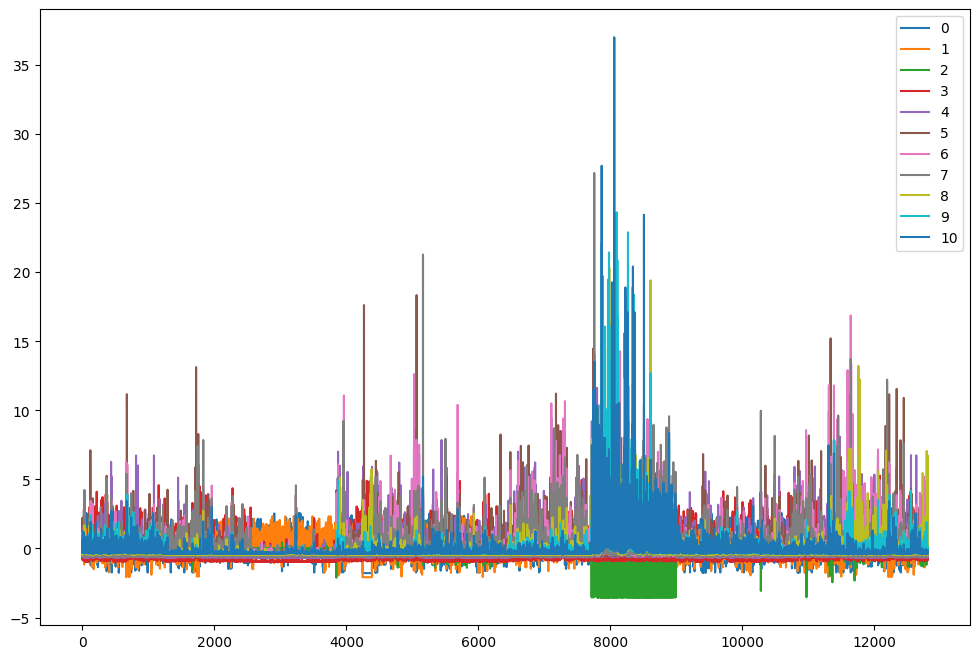

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.iloc[:,:11].plot(figsize=(12,8))


## Spliting data into train and test


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((8967, 11), (3844, 11), (8967,), (3844,))

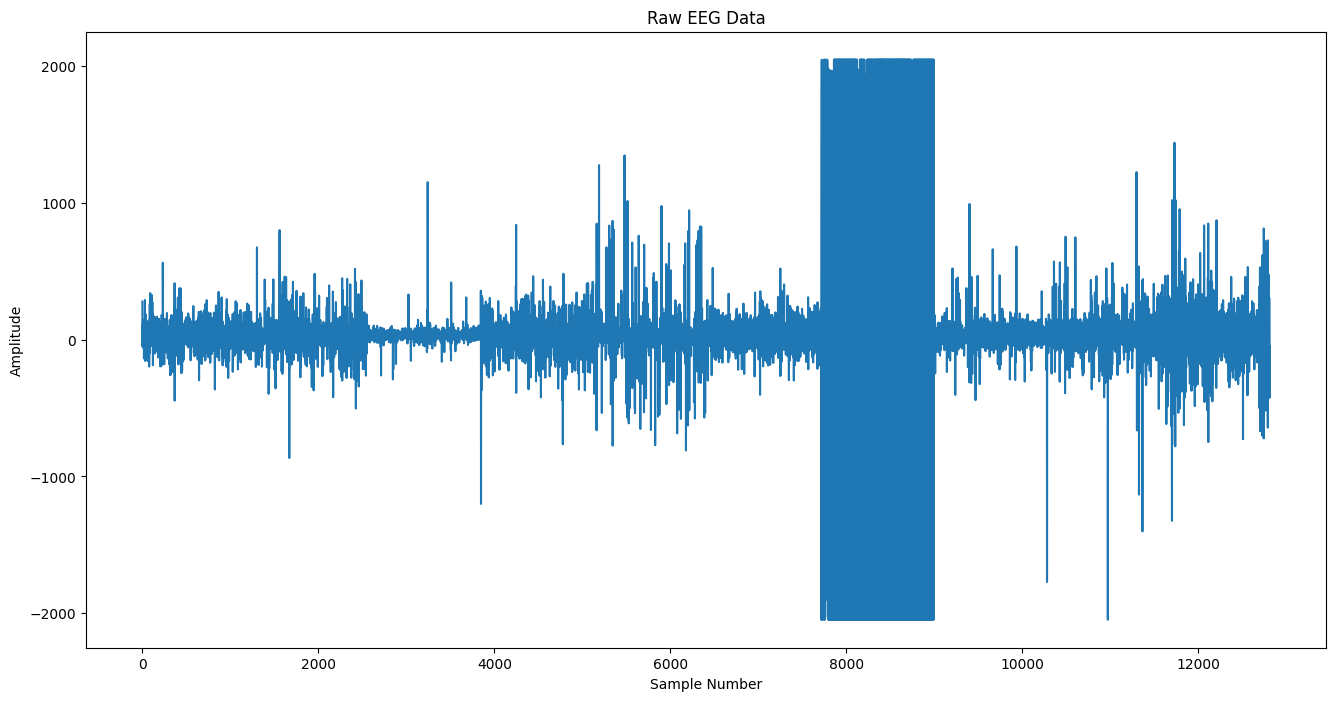

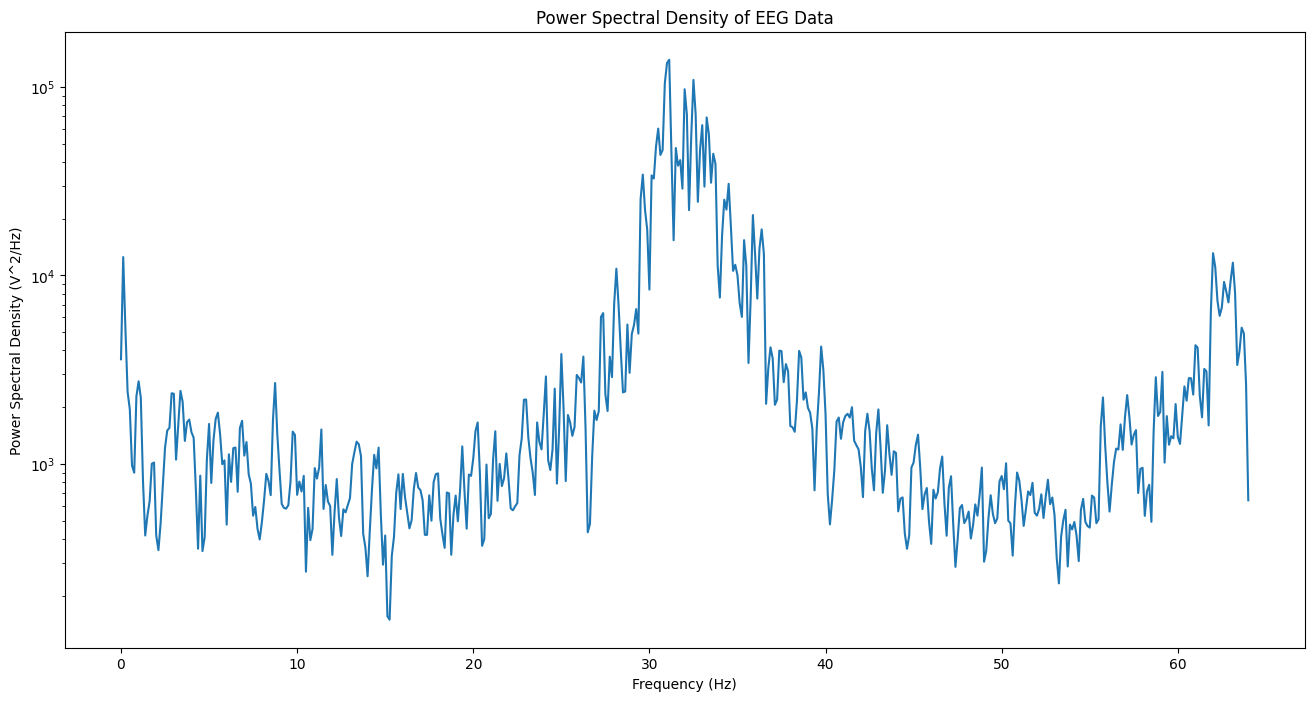

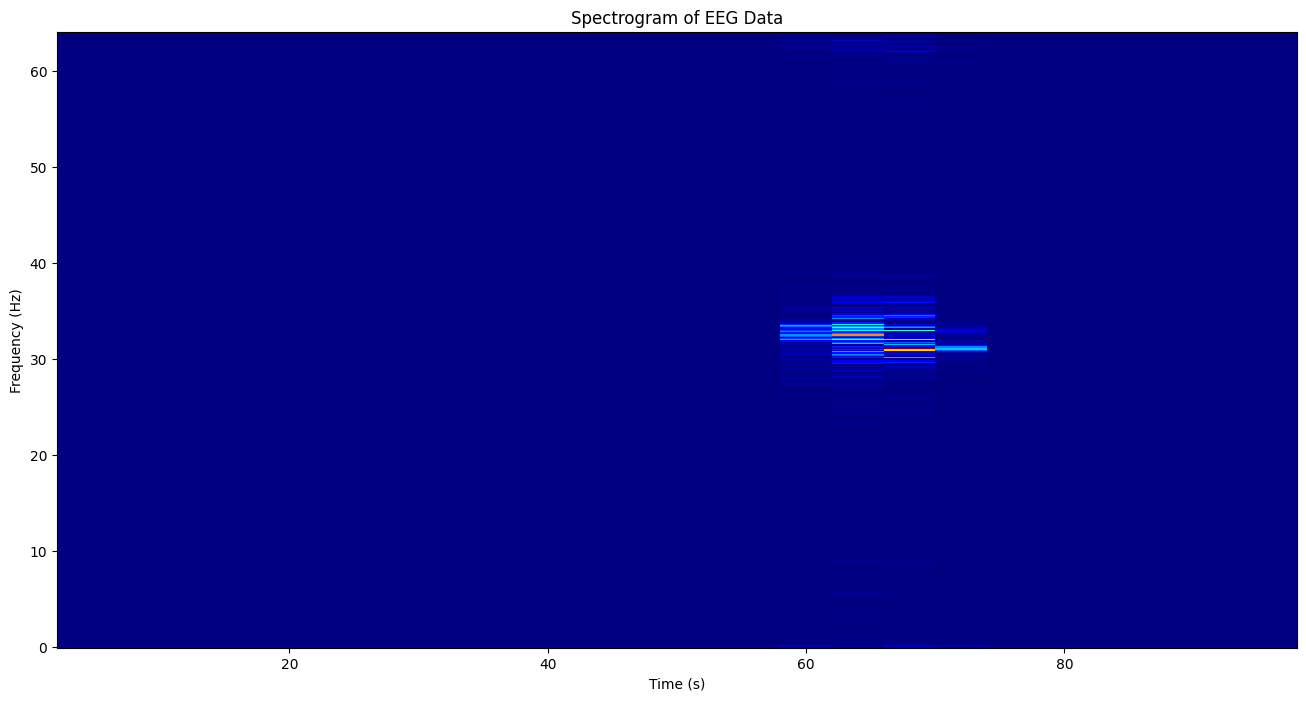

In [ ]:

plt.figure(figsize=(16, 8))
plt.plot(df["Raw"])
plt.title("Raw EEG Data")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()



In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

##Training and testing random forest classifier before addinng data generated from GANs




In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
accuracy_rf = rf_classifier.score(x_test, y_test)
print("Test Accuracy:", accuracy_rf*100)


Test Accuracy: 66.28511966701353


## Training and testing SVM classifier before adding data generated from GANs


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
accuracy_svm= svm.score(x_test,y_test)
print("Test Accuracy:", accuracy_svm*100)

Test Accuracy: 59.5213319458897


## Training and testing Bi-LSTM classifier before adding data generated from GANs


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



X_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
X_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy_bi_lstm = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy_bi_lstm*100)


Epoch 1/50
225/225 [==============================] - 19s 16ms/step - loss: 0.6797 - accuracy: 0.5703 - val_loss: 0.6779 - val_accuracy: 0.5842
Epoch 2/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6738 - accuracy: 0.5929 - val_loss: 0.6703 - val_accuracy: 0.5975
Epoch 3/50
225/225 [==============================] - 3s 14ms/step - loss: 0.6727 - accuracy: 0.5926 - val_loss: 0.6675 - val_accuracy: 0.6070
Epoch 4/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6686 - accuracy: 0.6046 - val_loss: 0.6626 - val_accuracy: 0.6014
Epoch 5/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6656 - accuracy: 0.6000 - val_loss: 0.6573 - val_accuracy: 0.6070
Epoch 6/50
225/225 [==============================] - 2s 10ms/step - loss: 0.6647 - accuracy: 0.6059 - val_loss: 0.6579 - val_accuracy: 0.6171
Epoch 7/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6645 - accuracy: 0.6090 - val_loss: 0.6611 - val_accuracy: 0.6070
Ep

## Training and testing XgBoost classifier before adding data generated from GANs


In [ ]:
import xgboost as xgb
xb=xgb.XGBClassifier(objective='binary:logistic',n_estimators=1000,seed=1)
xb.fit(x_train,y_train)
accuracy_xb=xb.score(x_test,y_test)
print("Test Accuracy:", accuracy_xb*100)

Test Accuracy: 63.47554630593132


## Training and testing MLP classifier before adding data generated from GANs


In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, accuracy_mlp = model.evaluate(x_test, y_test)

print('Test accuracy:', accuracy_mlp*100)

Epoch 1/50
225/225 [==============================] - 2s 4ms/step - loss: 0.6727 - accuracy: 0.5896 - val_loss: 0.6596 - val_accuracy: 0.6148
Epoch 2/50
225/225 [==============================] - 1s 4ms/step - loss: 0.6626 - accuracy: 0.6062 - val_loss: 0.6641 - val_accuracy: 0.6037
Epoch 3/50
225/225 [==============================] - 1s 5ms/step - loss: 0.6595 - accuracy: 0.6184 - val_loss: 0.6540 - val_accuracy: 0.6198
Epoch 4/50
225/225 [==============================] - 1s 5ms/step - loss: 0.6563 - accuracy: 0.6215 - val_loss: 0.6529 - val_accuracy: 0.6232
Epoch 5/50
225/225 [==============================] - 1s 4ms/step - loss: 0.6529 - accuracy: 0.6225 - val_loss: 0.6555 - val_accuracy: 0.6243
Epoch 6/50
225/225 [==============================] - 1s 4ms/step - loss: 0.6502 - accuracy: 0.6268 - val_loss: 0.6526 - val_accuracy: 0.6265
Epoch 7/50
225/225 [==============================] - 1s 4ms/step - loss: 0.6476 - accuracy: 0.6268 - val_loss: 0.6533 - val_accuracy: 0.6310
Epoch 

## Using GAN to generate new data for confused label



In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler


mask=y==1
X_train = X[mask]

generator = keras.Sequential(
    [
        layers.Dense(256, input_dim=100, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(X_train.shape[1], activation="tanh"),
    ],
    name="generator",
)

discriminator = keras.Sequential(
    [
        layers.Dense(2048, input_dim=X_train.shape[1], activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.trainable = False
gan = keras.Sequential(
    [generator, discriminator],
    name="gan",
)

generator_optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator.compile(
    optimizer=discriminator_optimizer, loss="binary_crossentropy"
)
gan.compile(optimizer=generator_optimizer, loss="binary_crossentropy")

def generate_eeg_data(num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    generated_data = generator.predict(noise)
    return generated_data

batch_size = 256
epochs = 20
num_batches = X_train.shape[0] // batch_size
for epoch in range(epochs):
    for batch in range(num_batches):
        real_data = X_train[batch * batch_size : (batch + 1) * batch_size]
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_data = generator.predict(noise)
        discriminator_loss_real = discriminator.train_on_batch(
            real_data, np.ones((batch_size, 1))
        )
        discriminator_loss_fake = discriminator.train_on_batch(
            fake_data, np.zeros((batch_size, 1))
        )
        discriminator_loss = 0.5 * (
            discriminator_loss_real + discriminator_loss_fake
        )

        noise = np.random.normal(0, 1, (batch_size, 100))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Generator loss: {generator_loss}, Discriminator loss: {discriminator_loss}")


num_samples = 1000
generated_data = generate_eeg_data(num_samples)



8/8 [==============================] - 0s 2ms/step
Epoch 0, Generator loss: 0.6354290246963501, Discriminator loss: 0.717145711183548
8/8 [==============================] - 0s 2ms/step
Epoch 1, Generator loss: 0.6348667740821838, Discriminator loss: 0.717424750328064
8/8 [==============================] - 0s 2ms/step
Epoch 2, Generator loss: 0.6351562142372131, Discriminator loss: 0.7173001766204834
8/8 [==============================] - 0s 2ms/step
Epoch 3, Generator loss: 0.6349356174468994, Discriminator loss: 0.7173815667629242
8/8 [==============================] - 0s 2ms/step
Epoch 4, Generator loss: 0.6344411373138428, Discriminator loss: 0.7176811695098877
8/8 [==============================] - 0s 2ms/step
Epoch 5, Generator loss: 0.6344674825668335, Discriminator loss: 0.7176676392555237
8/8 [==============================] - 0s 2ms/step
Epoch 6, Generator loss: 0.6346156597137451, Discriminator loss: 0.717575192451477
8/8 [==============================] - 0s 2ms/step
Epoch 7

## Using GAN to generate new data for not-confused label

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler


mask=y==0
X_train = X[mask]

generator = keras.Sequential(
    [
        layers.Dense(256, input_dim=100, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(X_train.shape[1], activation="tanh"),
    ],
    name="generator",
)

discriminator = keras.Sequential(
    [
        layers.Dense(2048, input_dim=X_train.shape[1], activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.trainable = False
gan = keras.Sequential(
    [generator, discriminator],
    name="gan",
)

generator_optimizer = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5)
discriminator.compile(
    optimizer=discriminator_optimizer, loss="binary_crossentropy"
)
gan.compile(optimizer=generator_optimizer, loss="binary_crossentropy")

def generate_eeg_data(num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    generated_data = generator.predict(noise)
    return generated_data

batch_size = 512
epochs = 20
num_batches = X_train.shape[0] // batch_size
for epoch in range(epochs):
    for batch in range(num_batches):
        real_data = X_train[batch * batch_size : (batch + 1) * batch_size]
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_data = generator.predict(noise)
        discriminator_loss_real = discriminator.train_on_batch(
            real_data, np.ones((batch_size, 1))
        )
        discriminator_loss_fake = discriminator.train_on_batch(
            fake_data, np.zeros((batch_size, 1))
        )
        discriminator_loss = 0.5 * (
            discriminator_loss_real + discriminator_loss_fake
        )

        noise = np.random.normal(0, 1, (batch_size, 100))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Generator loss: {generator_loss}, Discriminator loss: {discriminator_loss}")


num_samples = 100000
generated_data_not_confused = generate_eeg_data(num_samples)



16/16 [==============================] - 0s 1ms/step
Epoch 0, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 1ms/step
Epoch 1, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 1ms/step
Epoch 2, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 2ms/step
Epoch 3, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 2ms/step
Epoch 4, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 1ms/step
Epoch 5, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 0s 2ms/step
Epoch 6, Generator loss: 0.6427544951438904, Discriminator loss: 0.7174795567989349
16/16 [==============================] - 

## Combining newly generated data for both the labels

In [ ]:

nc=pd.DataFrame(generated_data_not_confused)
nc[11]=1
c=pd.DataFrame(generated_data)
c[11]=0
df_combined = pd.concat([nc, c])
train_combined=x_train
train_combined[11] = y_train
df_combined= pd.concat([df_combined,train_combined])



             0         1         2         3         4         5         6   \
2400   0.850297  0.609900  0.024133 -0.940423 -0.610153 -0.182462 -0.132347   
6227  -1.050182  0.124358  0.007408 -0.503039  0.117302  0.904480  0.473328   
3544  -0.013557  0.963022 -0.047785 -0.944533 -0.646245 -0.473399 -0.343642   
4581   0.375178  0.124358  0.094379  0.227963 -0.395517 -0.470817 -0.519936   
7199  -0.315906  0.830601 -0.173225  2.025526  0.627537 -0.249535 -0.140544   
...         ...       ...       ...       ...       ...       ...       ...   
11964 -0.272713  0.433339 -0.454209  1.266596  1.986520  2.128551  0.632095   
5191   1.239032  0.256779 -0.094616 -0.946983 -0.680293 -0.547224 -0.532900   
5390  -1.050182 -0.581885 -0.164862 -0.549856 -0.387013 -0.485522 -0.307029   
860   -1.050182  0.036078  0.045876 -0.706503 -0.484689 -0.446628 -0.401418   
7270   0.288792  1.360283 -0.077891  2.733277  0.714025  0.487086  0.313978   

             7         8         9         10   11 

## Training and testing random forest classifier on data generated from GAN



In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_combined.iloc[:,:-1], df_combined.iloc[:,11])
f_accuracy_rf = rf_classifier.score(x_test,y_test)
print("Accuracy:", f_accuracy_rf*100)



Accuracy: 66.31113423517169


## Training and testing SVM classifier on data generated from GAN



In [ ]:

svm=SVC(kernel='linear')
svm.fit(df_combined.iloc[:,:-1], df_combined.iloc[:,11])
f_accuracy_svm= svm.score(x_test,y_test)
print("Test Accuracy:", f_accuracy_svm*100)

Test Accuracy: 56.737773152965666


## Training and testing Bi-LSTM classifier on data generated from GAN




In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



X_train = np.reshape(df_combined.iloc[:,:-1].values, (df_combined.iloc[:,:-1].shape[0], df_combined.iloc[:,:-1].shape[1], 1))
X_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, df_combined.iloc[:,11], epochs=2, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, f_accuracy_bi_lstm = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', f_accuracy_bi_lstm*100)


Epoch 1/2
2750/2750 [==============================] - 40s 12ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 3.1653 - val_accuracy: 0.7588
Epoch 2/2
121/121 [==============================] - 1s 4ms/step - loss: 6.8484 - accuracy: 0.5096
Test loss: 6.848412990570068
Test accuracy: 50.96253752708435


## Training and testing XgBoost classifier on data generated from GAN:


In [ ]:
import xgboost as xgb
xb=xgb.XGBClassifier(objective='binary:logistic',n_estimators=1000,seed=1)
xb.fit(df_combined.iloc[:,:-1],df_combined.iloc[:,11])
f_accuracy_xb=xb.score(x_test,y_test)
print("Test Accuracy:", f_accuracy_xb*100)

Test Accuracy: 62.7471383975026


##Training and testing MLP classifier on data generated from GAN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=df_combined.iloc[:,:-1].shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(df_combined.iloc[:,:-1],  df_combined.iloc[:,11], epochs=2, batch_size=32, validation_split=0.2)

test_loss, f_accuracy_mlp = model.evaluate(x_test, y_test)

print('Test accuracy:', f_accuracy_mlp*100)

Epoch 1/2
2750/2750 [==============================] - 13s 4ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.8151 - val_accuracy: 0.7571
Epoch 2/2
121/121 [==============================] - 0s 2ms/step - loss: 1.4951 - accuracy: 0.5042
Test accuracy: 50.41623115539551


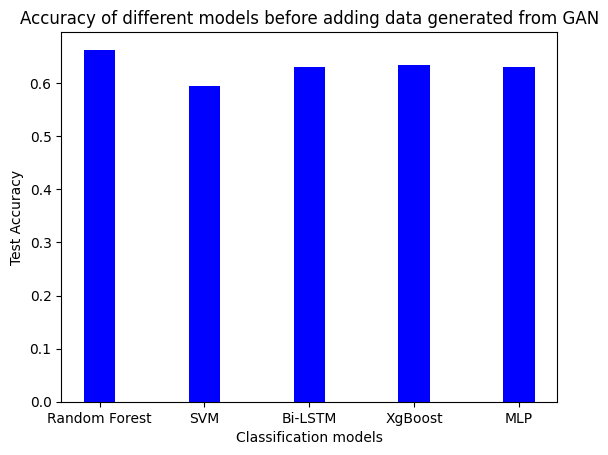

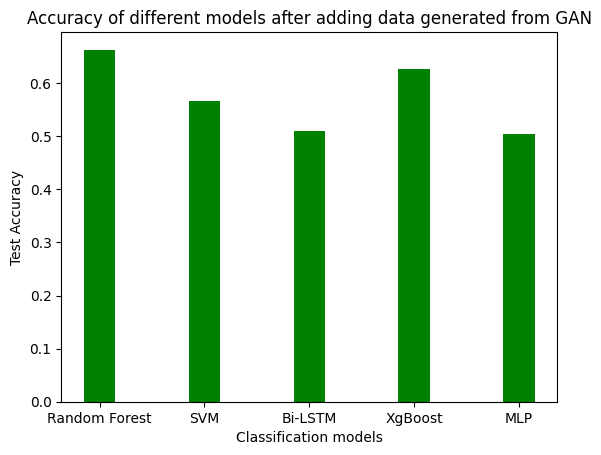

In [ ]:
before_gan={'Random Forest':accuracy_rf,'SVM':accuracy_svm,'Bi-LSTM':accuracy_bi_lstm,'XgBoost':accuracy_xb,'MLP':accuracy_mlp}
after_gan={'Random Forest':f_accuracy_rf,'SVM':f_accuracy_svm,'Bi-LSTM':f_accuracy_bi_lstm,'XgBoost':f_accuracy_xb,'MLP':f_accuracy_mlp}

plt.bar(list(before_gan.keys()), list(before_gan.values()), color ='blue',
        width = 0.3)

plt.xlabel("Classification models")
plt.ylabel("Test Accuracy")
plt.title("Accuracy of different models before adding data generated from GAN")
plt.show()


plt.bar(list(after_gan.keys()), list(after_gan.values()), color ='green',
        width = 0.3)

plt.xlabel("Classification models")
plt.ylabel("Test Accuracy")
plt.title("Accuracy of different models after adding data generated from GAN")
plt.show()



## Comparing accuracies of model before using GAN and After using GAN

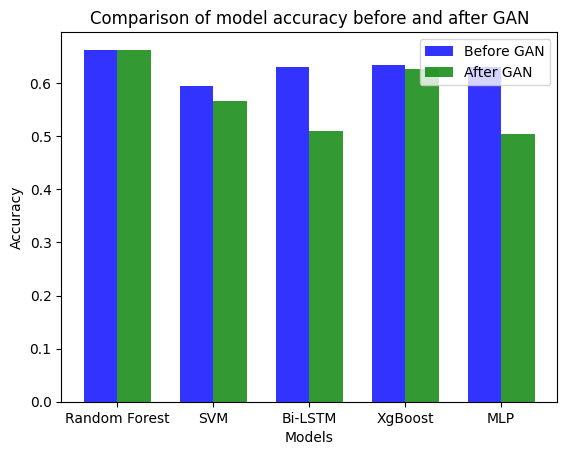

In [ ]:
fig, ax = plt.subplots()
models = list(before_gan.keys())
before_gan_values = list(before_gan.values())
after_gan_values = list(after_gan.values())
bar_width = 0.35
opacity = 0.8
index = np.arange(len(models))
rects1 = ax.bar(index, before_gan_values, bar_width, alpha=opacity, color='blue', label='Before GAN')
rects2 = ax.bar(index + bar_width, after_gan_values, bar_width, alpha=opacity, color='g', label='After GAN')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of model accuracy before and after GAN')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()